In [29]:
import sys
sys.path.insert(0,"..")
import pandas as pd
import numpy as np
from Data.DataPreprocessing import DataPreprocessing as myData
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import TreeSearch
import matplotlib.pyplot as plt

In [30]:
loaded_data = myData.load_data()

#display(loaded_data)
data = myData.preprocess_data(loaded_data)
train_data, validation_data, test_data = myData.split_data(data,num_rows = 50000)
feature_states = myData.get_feature_states(data)

display(data)

c:\Users\zachs\Documents\CSHons\ResearchReport\Research_Code\Honours-Research\Baseline\..\Data\DataPreprocessing.py:14: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../Data/accepted_2007_to_2018Q4.csv", engine='c')
c:\Users\zachs\Documents\CSHons\ResearchReport\Research_Code\Honours-Research\HonoursResearch\Lib\site-packages\sklearn\preprocessing\_discretization.py:263: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn(
c:\Users\zachs\Documents\CSHons\ResearchReport\Research_Code\Honours-Research\HonoursResearch\Lib\site-packages\sklearn\preprocessing\_discretization.py:263: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn(
c:\Users\zachs\Documents\CSHons\ResearchReport\Research_Code\Honours-Research\HonoursResearch\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clus

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,"(961.0, 8800.0]",36 months,"(10.446, 15.582]","(5.898, 350.054]",C,10+ years,MORTGAGE,0.0,Not Verified,2015,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,N,Cash,N
1,"(24400.0, 32200.0]",36 months,"(10.446, 15.582]","(692.498, 1034.942]",C,10+ years,MORTGAGE,0.0,Not Verified,2015,...,0.0,4.0,0.0,0.0,0.0,1.0,2.0,N,Cash,N
2,"(16600.0, 24400.0]",60 months,"(10.446, 15.582]","(350.054, 692.498]",B,10+ years,MORTGAGE,0.0,Not Verified,2015,...,0.0,4.0,2.0,0.0,0.0,0.0,0.0,N,Cash,N
4,"(8800.0, 16600.0]",60 months,"(20.718, 25.854]","(5.898, 350.054]",F,3 years,MORTGAGE,0.0,Source Verified,2015,...,1.0,4.0,2.0,0.0,0.0,2.0,1.0,N,Cash,N
5,"(8800.0, 16600.0]",36 months,"(10.446, 15.582]","(350.054, 692.498]",C,4 years,RENT,0.0,Source Verified,2015,...,0.0,4.0,4.0,0.0,0.0,0.0,0.0,N,Cash,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,"(16600.0, 24400.0]",60 months,"(5.284, 10.446]","(350.054, 692.498]",B,5 years,OWN,0.0,Not Verified,2016,...,0.0,4.0,1.0,0.0,0.0,1.0,0.0,N,Cash,N
2260690,"(24400.0, 32200.0]",60 months,"(10.446, 15.582]","(350.054, 692.498]",C,9 years,MORTGAGE,1.0,Not Verified,2016,...,0.0,4.0,2.0,0.0,0.0,2.0,2.0,N,Cash,N
2260691,"(24400.0, 32200.0]",60 months,"(10.446, 15.582]","(692.498, 1034.942]",C,3 years,MORTGAGE,1.0,Source Verified,2016,...,0.0,4.0,0.0,0.0,0.0,2.0,0.0,N,Cash,N
2260692,"(8800.0, 16600.0]",60 months,"(10.446, 15.582]","(350.054, 692.498]",C,10+ years,RENT,1.0,Not Verified,2016,...,0.0,3.0,2.0,1.0,0.0,1.0,0.0,N,Cash,N


INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'loan_amnt': 'C', 'term': 'C', 'int_rate': 'C', 'installment': 'C', 'grade': 'C', 'emp_length': 'C', 'home_ownership': 'C', 'annual_inc': 'C', 'verification_status': 'C', 'issue_d': 'C', 'loan_status': 'C', 'purpose': 'C', 'dti': 'C', 'delinq_2yrs': 'C', 'earliest_cr_line': 'C', 'fico_range_high': 'C', 'inq_last_6mths': 'C', 'open_acc': 'C', 'pub_rec': 'C', 'revol_bal': 'C', 'revol_util': 'C', 'total_acc': 'C', 'initial_list_status': 'C', 'out_prncp': 'C', 'out_prncp_inv': 'C', 'total_pymnt': 'C', 'total_rec_int': 'C', 'total_rec_late_fee': 'C', 'recoveries': 'C', 'last_pymnt_amnt': 'C', 'last_credit_pull_d': 'C', 'last_fico_range_high': 'C', 'collections_12_mths_ex_med': 'C', 'policy_code': 'C', 'application_type': 'C', 'acc_now_delinq': 'C', 'tot_coll_amt': 'C', 'tot_cur_bal': 'C', 'open_acc_6m': 'C', 'open_act_il': 'C', 'open_il_12m': 'C', 'open_il_24m': 'C', 'total_bal_il': 'C'

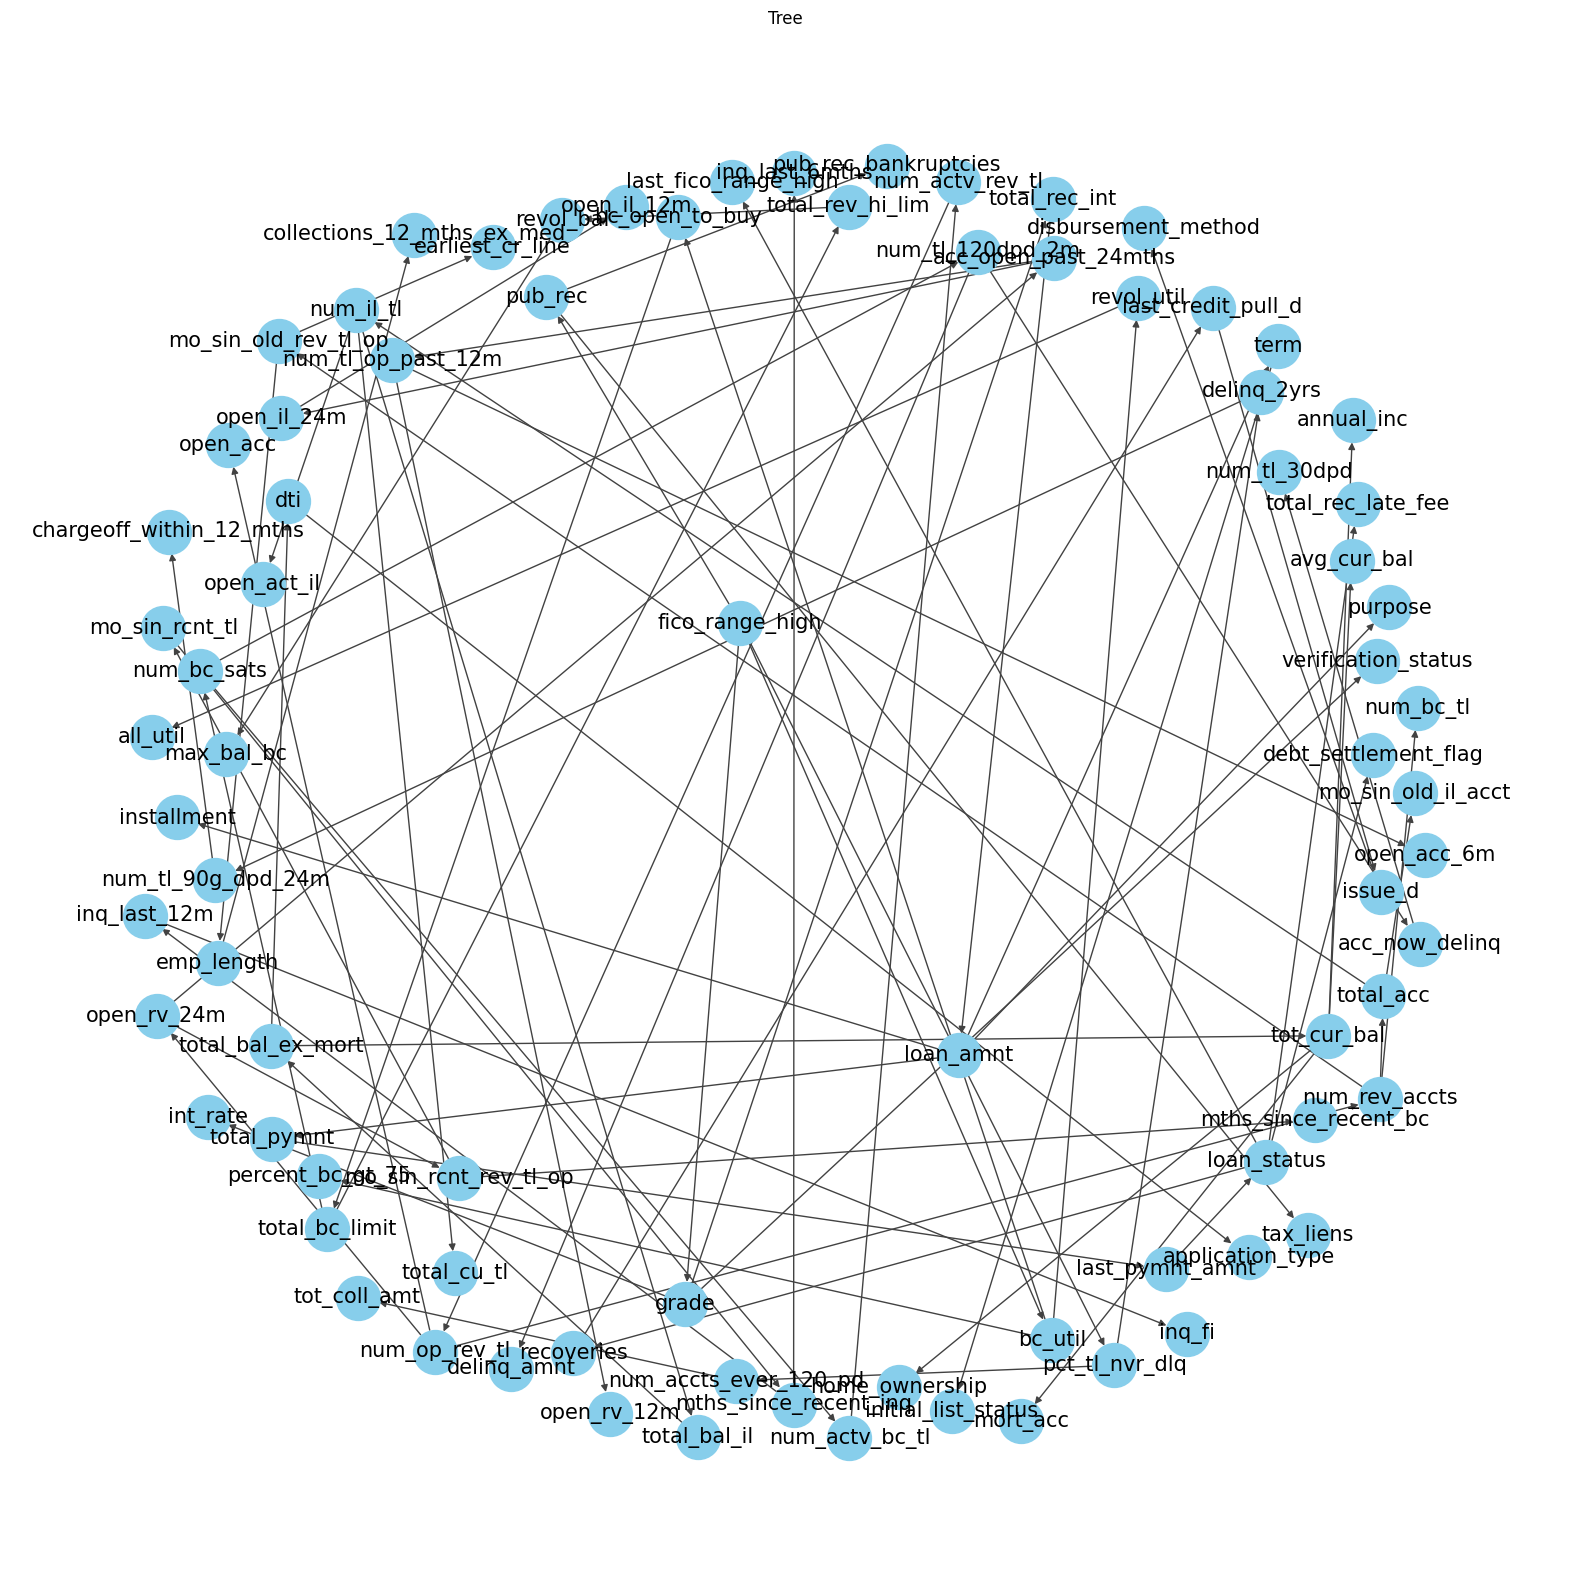

In [31]:
import networkx as nx
est = TreeSearch(train_data, root_node="fico_range_high")
dag = est.estimate(estimator_type="chow-liu")
nx_graph = nx.DiGraph(dag.edges())
pos = nx.spring_layout(nx_graph,2)
fig, ax = plt.subplots(ncols=1, figsize=(20, 20))
nx.draw(nx_graph, pos, with_labels=True, node_size=1000, node_color = 'skyblue', edge_color='#424242',font_size=15,font_color='black')
ax.set_title("Tree")
plt.show()

In [32]:
very_basic_evidence_features = ["annual_inc","emp_length", "grade", "verification_status","fico_range_high","purpose","dti", "home_ownership", "tot_cur_bal", "pub_rec_bankruptcies"]
basic_evidence_features = ["annual_inc", "emp_length", "grade", "home_ownership", "verification_status", "last_fico_range_high", "fico_range_high", "purpose", "dti", "application_type", "delinq_2yrs", "avg_cur_bal", "tot_cur_bal", "pub_rec_bankruptcies", "mort_acc", "num_il_tl", "num_rev_accts", "total_bal_ex_mort"]
more_detailed_evidence_features = ["annual_inc", "emp_length", "grade", "home_ownership", "verification_status", "last_fico_range_high", "fico_range_high", "purpose", "dti", "application_type", "delinq_2yrs", "avg_cur_bal", "tot_cur_bal", "pub_rec_bankruptcies", "mort_acc", "num_il_tl", "num_rev_accts", "total_bal_ex_mort", "revol_bal", "num_actv_rev_tl","num_op_rev_tl","max_bal_bc","total_rev_hi_lim","total_bal_il","open_acc","total_acc","tax_liens","pub_rec","num_bc_tl","earliest_cr_line","pct_tl_nvr_dlq","acc_now_delinq"]
advanced_evidence_features =  ["annual_inc", "emp_length", "grade", "home_ownership", "verification_status", "last_fico_range_high", "fico_range_high", "purpose", "dti", "application_type", "delinq_2yrs", "avg_cur_bal", "tot_cur_bal", "pub_rec_bankruptcies", "mort_acc", "num_il_tl", "num_rev_accts", "total_bal_ex_mort", "revol_bal", "num_actv_rev_tl","num_op_rev_tl","max_bal_bc","total_rev_hi_lim","total_bal_il","open_acc","total_acc","tax_liens","pub_rec","num_bc_tl","earliest_cr_line","pct_tl_nvr_dlq","acc_now_delinq","revol_util","all_util","bc_util","total_cu_tl","total_bc_limit","num_actv_bc_tl","num_bc_sats","percent_bc_gt_75","num_tl_30dpd","num_tl_90g_dpd_24m","num_tl_120dpd_2m","num_accts_ever_120_pd"]
all_customer_info_evidence_features =  ["annual_inc", "emp_length", "grade", "home_ownership", "verification_status", "last_fico_range_high", "fico_range_high", "purpose", "dti", "application_type", "delinq_2yrs", "avg_cur_bal", "tot_cur_bal", "pub_rec_bankruptcies", "mort_acc", "num_il_tl", "num_rev_accts", "total_bal_ex_mort", "revol_bal", "num_actv_rev_tl","num_op_rev_tl","max_bal_bc","total_rev_hi_lim","total_bal_il","open_acc","total_acc","tax_liens","pub_rec","num_bc_tl","earliest_cr_line","pct_tl_nvr_dlq","acc_now_delinq","revol_util","all_util","bc_util","total_cu_tl","total_bc_limit","num_actv_bc_tl","num_bc_sats","percent_bc_gt_75","num_tl_30dpd","num_tl_90g_dpd_24m","num_tl_120dpd_2m","num_accts_ever_120_pd","open_il_12m","open_il_24m","num_tl_op_past_12m","open_acc_6m","acc_open_past_24mths","open_rv_12m","open_rv_24m","mo_sin_rcnt_tl","mths_since_recent_bc","mo_sin_rcnt_rev_tl_op","mo_sin_old_rev_tl_op","mo_sin_old_il_acct","mths_since_recent_inq","inq_fi","inq_last_6mths","inq_last_12m","bc_open_to_buy"]
   
loan_structure_target_list = ["int_rate","term","installment", "loan_amnt"]   



In [35]:
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.estimators import BayesianEstimator
from pgmpy.metrics import log_likelihood_score
from pgmpy.inference import VariableElimination
from pgmpy.metrics import correlation_score
from sklearn.metrics import f1_score, accuracy_score, roc_curve, precision_score, recall_score, roc_auc_score, balanced_accuracy_score


model = BayesianNetwork(dag.edges())
#estimator=BayesianEstimator
#prior_type = "K2"
model.fit(
    train_data, estimator=BayesianEstimator, state_names=feature_states, prior_type = "K2")
model.get_cpds()
model.add_nodes_from(dag.nodes())
model.add_edges_from(dag.edges())
inference = VariableElimination(model)
inference.map_query(variables=loan_structure_target_list, evidence = {"fico_range_high":'(663.814, 701.2]',"loan_status": "Fully Paid"})


for feature in validation_data.columns:
    if feature not in model.nodes():
        validation_data.drop(feature, axis=1, inplace=True)
        
        
print(log_likelihood_score(model, validation_data))
print(correlation_score(model, validation_data, test="chi_square", significance_level=0.05,score = accuracy_score, return_summary= False))


INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'loan_amnt': 'C', 'term': 'C', 'int_rate': 'C', 'installment': 'C', 'grade': 'C', 'emp_length': 'C', 'home_ownership': 'C', 'annual_inc': 'C', 'verification_status': 'C', 'issue_d': 'C', 'loan_status': 'C', 'purpose': 'C', 'dti': 'C', 'delinq_2yrs': 'C', 'earliest_cr_line': 'C', 'fico_range_high': 'C', 'inq_last_6mths': 'C', 'open_acc': 'C', 'pub_rec': 'C', 'revol_bal': 'C', 'revol_util': 'C', 'total_acc': 'C', 'initial_list_status': 'C', 'out_prncp': 'C', 'out_prncp_inv': 'C', 'total_pymnt': 'C', 'total_rec_int': 'C', 'total_rec_late_fee': 'C', 'recoveries': 'C', 'last_pymnt_amnt': 'C', 'last_credit_pull_d': 'C', 'last_fico_range_high': 'C', 'collections_12_mths_ex_med': 'C', 'policy_code': 'C', 'application_type': 'C', 'acc_now_delinq': 'C', 'tot_coll_amt': 'C', 'tot_cur_bal': 'C', 'open_acc_6m': 'C', 'open_act_il': 'C', 'open_il_12m': 'C', 'open_il_24m': 'C', 'total_bal_il': 'C'

-inf
0.629320987654321
